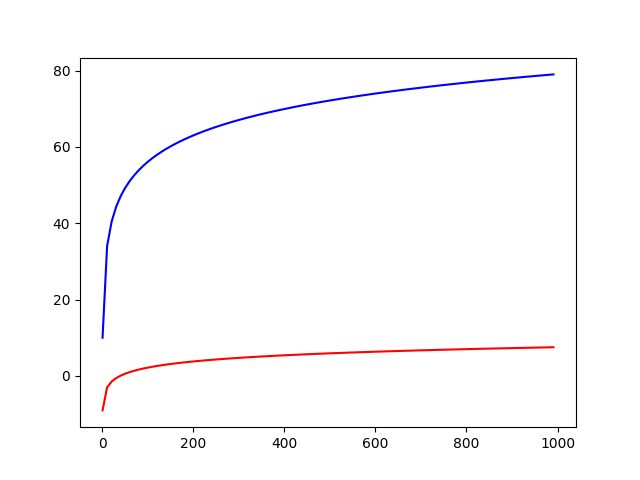

In [1]:
'''
A model that tries to fix itself to a function of a form a*ln(x) + c

To do:
    (1) make it fit better
    (2) include a parameter 'b' added to x
    (3) figure out ways to make the training phase behave properly near b
    (4) figure out ways of adjusting the learning rate based on derivatives of the parameters

SIDENOTE: the animation shows training cycle of just one model. Which is why you might wanna run it again if the model buggers off to infinity.
'''

'''
This line supposedly ensures that the animation works in my enviroment, which is vscode.
It was literally slapped here after a chaotic googling session, and noticing that it actually does what it's supposed to.
You might wanna adjust it to Your enviroment. How? No idea. Be strong. 
'''
%matplotlib widget


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np


class Model:
    def __init__(self, X):
        self.a = np.random.uniform( -10, 10 )
        self.b = np.random.uniform(-np.min( X ), 0)
        self.c = np.random.uniform( -10, 10 )
    
    def forward(self, X):
        #oblivion gate
        return self.a * np.log( X + self.b ) + self.c

    def backward(self, _X, _Y, _Yhat, lr):
        #possible critical point due to !/x

        X = _X
        Y = _Y
        Yhat = _Yhat
        
        terms1 = Y - Yhat
        terms2 = np.log( X + self.b )
        da = (-2) * np.mean( np.multiply( terms1, terms2 ))
        dc = (-2) * np.mean( terms1 )

        import math
        self.a = self.a - lr * da 
        self.c = self.c - lr * dc
            
        
    def update(self, X, Y, lr):
        Yhat = self.forward( X )
        self.backward( X, Y, Yhat, lr )


EPOCHS = 10000
LR = 0.001

#Feel free to tweak these
A = 10
C = 10

#ensure Xs are bigger than 0
X = np.arange( 1, 1000-B, step=10, dtype=float )
Y = A * np.log( X ) + C

model = Model( X )

fig, ax = plt.subplots()

og = ax.plot( X, Y, color='blue')[0]
fn = ax.plot( X, model.forward(X), color='red' )[0]

def update( frame ):
    model.update( X, Y, LR )
    fn.set_ydata( model.forward(X) )

plt.show()
ani = FuncAnimation( fig, update, frames=1 )




